<a href="https://colab.research.google.com/github/Nasrin-Akter-88/-Hepatocellular-Carcinoma-Survival-Prediction/blob/main/Hepatocellular_Carcinoma_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --user tensorflow


In [ ]:
pip install --user keras

In [ ]:
# Import Modeules 
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hcc-data-complete-balanced.csv to hcc-data-complete-balanced.csv


In [ ]:
# Let’s read dataset.

df = pd.read_csv('hcc-data-complete-balanced.csv')
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137,15.0,0,1,1,1.53,95.0,13.7,106.6,4.9,99.00,3.4,2.1,34,41,183,150,7.1,0.70,1,3.5,0.50,52.5,37.0,856.0,1
1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,0.0,0,1,1,1.24,2.6,10.3,83.0,6.1,1.71,3.9,0.8,11,28,77,120,7.0,0.58,1,1.8,0.85,32.0,10.0,18.0,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50.0,2,1,2,0.96,5.8,8.9,79.8,8.4,472.00,3.3,0.4,58,68,202,109,7.0,2.10,5,13.0,0.10,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30.0,0,1,1,0.95,2440.0,13.4,97.1,9.0,279.00,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.20,131.0,78.0,1316.0,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30.0,0,1,1,0.94,49.0,14.3,95.1,6.4,199.00,4.1,0.7,147,306,173,109,6.9,1.80,1,9.0,0.10,59.0,15.0,22.0,1


In [ ]:
# Let's have a look how many values are missing.
df.isnull().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
Albumin           0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodule            0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


In [ ]:
#Lets have a look at the data and see identify Object/Categorical values and Continuous values
df.dtypes

Gender              int64
Symptoms            int64
Alcohol             int64
HBsAg               int64
HBeAg               int64
HBcAb               int64
HCVAb               int64
Cirrhosis           int64
Endemic             int64
Smoking             int64
Diabetes            int64
Obesity             int64
Hemochro            int64
AHT                 int64
CRI                 int64
HIV                 int64
NASH                int64
Varices             int64
Spleno              int64
PHT                 int64
PVT                 int64
Metastasis          int64
Hallmark            int64
Age                 int64
Grams_day           int64
Packs_year        float64
PS                  int64
Encephalopathy      int64
Ascites             int64
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
Albumin           float64
Total_Bil         float64
ALT                 int64
AST         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          204 non-null    int64  
 1   Symptoms        204 non-null    int64  
 2   Alcohol         204 non-null    int64  
 3   HBsAg           204 non-null    int64  
 4   HBeAg           204 non-null    int64  
 5   HBcAb           204 non-null    int64  
 6   HCVAb           204 non-null    int64  
 7   Cirrhosis       204 non-null    int64  
 8   Endemic         204 non-null    int64  
 9   Smoking         204 non-null    int64  
 10  Diabetes        204 non-null    int64  
 11  Obesity         204 non-null    int64  
 12  Hemochro        204 non-null    int64  
 13  AHT             204 non-null    int64  
 14  CRI             204 non-null    int64  
 15  HIV             204 non-null    int64  
 16  NASH            204 non-null    int64  
 17  Varices         204 non-null    int

In [ ]:
df.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000
mean,0.794118,0.691176,0.720588,0.093137,0.014706,0.259804,0.205882,0.897059,0.058824,0.450980,0.357843,0.107843,0.053922,0.367647,0.142157,0.014706,0.04902,0.632353,0.534314,0.681373,0.220588,0.250000,0.656863,65.529412,75.294118,21.411765,1.122549,1.186275,1.455882,1.443971,1.588219e+04,12.715686,94.818627,1500.310784,116677.460931,3.417108,3.165000,66.372549,96.024510,271.441176,221.176471,9.500490,1.137794,2.735294,6.888235,1.740637,87.455392,39.948333,435.257353,0.50000
std,0.405340,0.463145,0.449814,0.291340,0.120669,0.439606,0.405340,0.304630,0.235873,0.498815,0.480545,0.310945,0.226418,0.483351,0.350070,0.120669,0.21644,0.483351,0.500048,0.467090,0.415663,0.434078,0.475925,12.778296,63.181354,44.184561,1.199212,0.470413,0.689838,0.482592,1.311175e+05,2.179336,8.167010,2804.763600,107643.411119,0.648610,5.853641,52.971490,81.639327,251.681481,168.852570,13.093015,0.950662,1.735894,4.832694,4.005980,55.405441,28.845124,440.448893,0.50123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.000000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.750000,19.250000,0.000000,0.000000,1.000000,1.000000,1.180000,6.050000e+00,11.300000,89.500000,5.350000,256.557500,3.000000,0.900000,31.000000,48.000000,93.500000,109.750000,6.300000,0.717500,1.000000,3.175000,0.360000,46.000000,17.000000,80.000000,0.00000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,67.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.320000,6.245000e+01,12.700000,94.550000,7.550000,96370.030000,3.400000,1.400000,53.000000,73.500000,184.500000,168.000000,7.000000,0.855000,2.000000,5.450000,0.700000,83.000000,30.500000,297.000000,0.50000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.250000,1.000000,74.250000,100.000000,33.250000,2.000000,1.000000,2.000000,1.550000,8.019250e+02,14.300000,100.050000,1447.500000,174536.447500,3.892500,2.812500,79.000000,111.250000,352.250000,277.250000,7.500000,1.102500,5.000000,9.000000,1.355000,111.250000,65.250000,748.250000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,500.000000,510.000000,4.0

#### About patients.

In [ ]:
print('The oldest patient: {} years.'.format(df['Age'].max()))
print('The youngest patient: {} years.'.format(df['Age'].min()))
print('Average age: {} years.'.format(df['Age'].mean()))
print('Median age: {} years.'.format(df['Age'].median(skipna=True)))

The oldest patient: 93 years.
The youngest patient: 20 years.
Average age: 65.52941176470588 years.
Median age: 67.0 years.


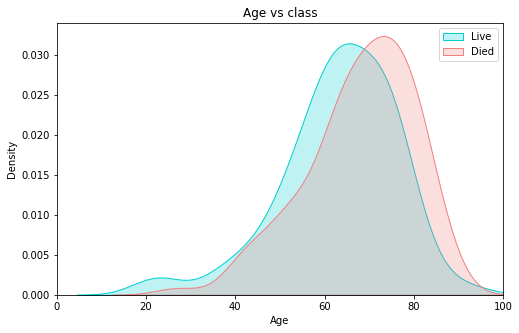

In [ ]:
plt.figure(figsize=(8,5))

sns.kdeplot(
    df.Age[df.Class == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    df.Age[df.Class == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('Age vs class')
plt.xlim(0,100)
plt.show()

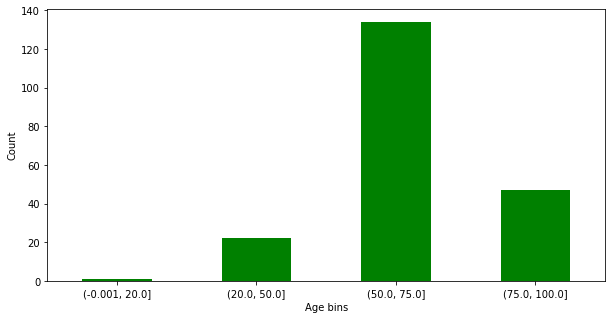

In [ ]:
bins = [0, 20, 50, 75, 100]

out = pd.cut(
    df.Age, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color="g", 
    figsize=(10,5)
)

plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

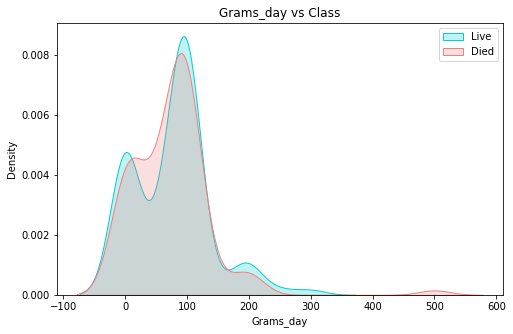

In [ ]:
plt.figure(figsize=(8,5))

sns.kdeplot(
    df.Grams_day[df.Class == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    df.Grams_day[df.Class == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('Grams_day vs Class')
plt.show()

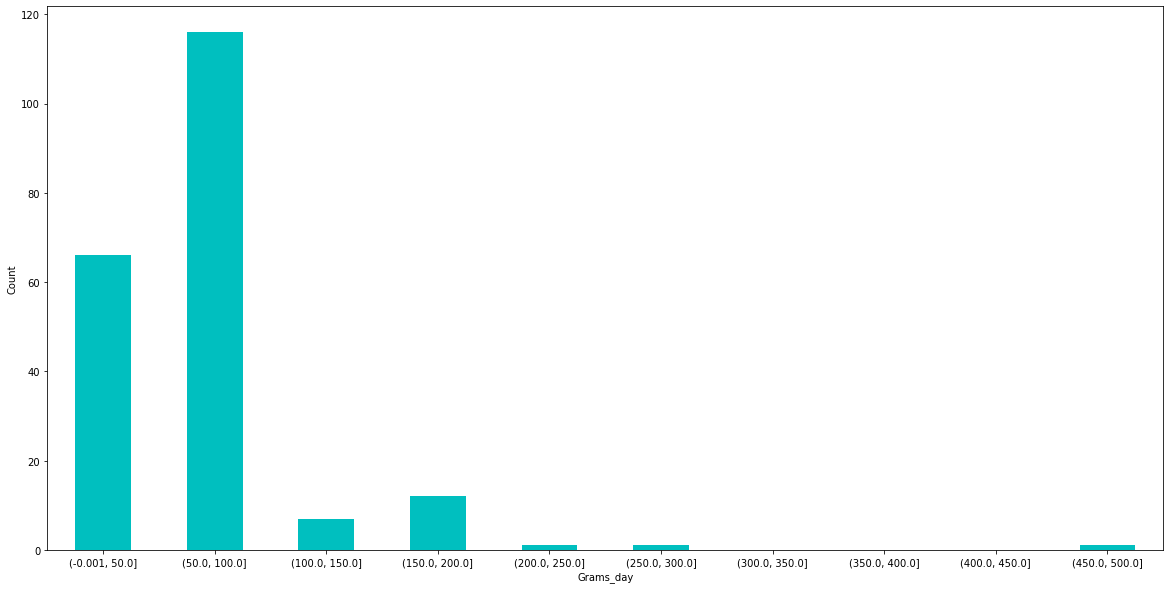

In [ ]:
bins = [
    0, 50, 100, 
    150, 200, 250, 
    300, 350, 400,
    450, 500
]

out = pd.cut(
    df.Grams_day, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color='c', 
    figsize=(20,10)
)

plt.xlabel('Grams_day')
plt.ylabel('Count')
plt.show()

In [ ]:
# To find the correlation among the columns using pearson method 
df.corr(method ='pearson') 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
Gender,1.000000e+00,0.053252,0.439439,0.163177,0.062206,0.080497,-0.040564,0.226460,-7.880090e-02,0.315296,0.076614,-0.018393,0.121558,0.136809,0.033695,-0.038508,-0.052847,0.114624,0.156545,0.250238,0.036977,-4.199605e-02,0.066092,0.152395,0.353418,0.179415,0.042027,0.047111,0.161146,0.156808,0.028504,-0.007479,0.165744,0.116305,-0.076602,-0.028695,0.136569,0.116467,0.177895,0.044691,-0.117936,0.113168,0.030264,-0.147845,-0.110634,0.128408,0.239621,0.273711,0.266071,-2.691895e-17
Symptoms,5.325230e-02,1.000000,-0.037903,0.068184,0.081663,0.129870,-0.027012,-0.121690,3.183035e-02,-0.033866,-0.142892,-0.143867,-0.028324,0.157596,0.059426,-0.182769,0.053478,-0.157596,-0.028465,0.043868,0.125309,2.389044e-01,0.053242,-0.003868,0.021469,-0.141078,0.254733,0.084456,0.196131,0.028875,0.035437,-0.139151,-0.146417,0.133758,0.224250,-0.135652,0.065822,0.023788,0.067036,0.101544,0.195532,0.090522,-0.026393,0.100018,0.176421,0.119081,0.001534,0.091161,0.168113,-2.864732e-01
Alcohol,4.394385e-01,-0.037903,1.000000,-0.063571,-0.105437,-0.079498,-0.196277,0.472108,-1.229013e-01,0.147227,0.031838,0.110839,0.148661,-0.023657,-0.090630,-0.014681,-0.061015,0.204915,0.119488,0.418236,0.120498,3.153648e-02,0.263271,0.156131,0.694852,-0.063582,0.209906,0.130781,0.190271,0.213911,0.067398,-0.173396,0.206453,-0.090589,-0.164504,-0.161835,-0.048671,-0.019385,0.044455,0.071759,-0.117065,-0.144261,-0.077018,-0.019483,-0.153802,-0.089240,0.143868,0.167004,0.029729,1.092456e-02
HBsAg,1.631767e-01,0.068184,-0.063571,1.000000,0.381216,0.502468,0.003681,0.108561,2.783052e-01,0.048520,-0.204045,-0.111421,-0.076508,-0.034467,-0.033858,0.100971,-0.072760,0.069449,0.062489,0.110551,0.032902,1.655486e-01,-0.052595,-0.010664,-0.013003,0.121568,0.178665,0.340057,0.155355,-0.003344,-0.014811,-0.027140,0.151230,0.050940,-0.050424,0.012381,0.208336,0.084882,0.106152,-0.027234,0.029105,-0.024807,0.111552,0.165875,0.058162,0.211454,0.008956,0.021092,0.064767,5.060094e-02
HBeAg,6.220564e-02,0.081663,-0.105437,0.381216,1.000000,0.206212,0.139222,0.041385,-3.054236e-02,0.052956,-0.091199,-0.042475,-0.029166,-0.093153,-0.049733,-0.014925,-0.027737,0.093153,0.114054,0.083543,-0.064994,-7.053456e-02,-0.169031,-0.027437,-0.065183,-0.055653,0.293861,0.472195,0.214956,0.163946,0.006841,0.014104,0.069201,0.161103,0.201975,-0.078129,0.622814,0.159437,0.203982,0.008058,0.193771,-0.024636,0.402221,0.065710,-0.075728,0.633122,0.049686,0.119101,0.464191,-1.221694e-01
HBcAb,8.049666e-02,0.129870,-0.079498,0.502468,0.206212,1.000000,0.334183,0.163909,1.844410e-01,0.114526,-0.302345,-0.025792,-0.042456,-0.127168,-0.081123,0.206212,-0.030962,0.080801,0.082497,0.141238,-0.072551,-6.453762e-03,-0.066250,-0.158777,-0.072467,-0.070713,0.004718,0.169783,0.062348,-0.058292,-0.049645,0.073367,0.123504,-0.004619,-0.098869,0.033919,0.046681,0.287964,0.219848,0.039431,-0.014093,0.204613,0.009511,0.013100,-0.155069,0.076830,0.296491,0.283558,0.092795,5.589122e-02
HCVAb,-4.056437e-02,-0.027012,-0.196277,0.003681,0.139222,0.334183,1.000000,0.052802,1.303246e-01,0.123252,-0.051324,-0.098860,0.039467,-0.111666,-0.068411,0.239936,-0.059453,0.036236,0.086493,0.035967,-0.153928,4.199605e-02,-0.066092,-0.212312,-0.133945,-0.044777,-0.153503,-0.047111,0.032644,-0.055069,-0.024440,0.086665,0.008359,0.052398,0.096827,0.013331,0.238695,0.325637,0.272563,0.054249,0.103685,0.140604,0.215696,0.063833,-0.081744,0.299590,0.314078,0.248305,0.131676,-7.273930e-02
Cirrhosis,2.264598e-01,-0.121690,0.472108,0.108561,0.041385,0.163909,0.052802,1.000000,-1.209835e-01,0.047674,-0.049982,0.117777,0.080873,-0.210082,-0.231645,0.041385,0.002197,0.377360,0.298180,0.391515,0.141312

These variables have little or no correlation : Gender,  Alcohol, HBsAg, HBcAb, HCVAb, Cirrhosis, Obesity, Hemochro, AHT, HIV, NASH, Varices,Spleno, PHT,Grams_day, Hallmark, Packs_year,AFP, MCV,ALT,TP, Nodule, Iron.

let's ommit these columns

In [ ]:
df.drop(['Gender','Alcohol','HBsAg','HBcAb','HCVAb','Cirrhosis','Obesity','Hemochro','AHT','HIV','NASH','Varices','Spleno','PHT','Grams_day','Hallmark','Packs_year','AFP','MCV','ALT','TP','Nodule','Iron'], axis='columns', inplace=True)

In [ ]:
print(df.shape)

(204, 27)


In [ ]:
df.head()

,Symptoms,HBeAg,Endemic,Smoking,Diabetes,CRI,PVT,Metastasis,Age,PS,Encephalopathy,Ascites,INR,Hemoglobin,Leucocytes,Platelets,Albumin,Total_Bil,AST,GGT,ALP,Creatinine,Major_Dim,Dir_Bil,Sat,Ferritin,Class
0,0,0,0,1,1,0,0,0,67,0,1,1,1.53,13.7,4.9,99.00,3.4,2.1,41,183,150,0.70,3.5,0.50,37.0,856.0,1
1,0,0,0,1,1,0,0,0,62,0,1,1,1.24,10.3,6.1,1.71,3.9,0.8,28,77,120,0.58,1.8,0.85,10.0,18.0,1
2,0,0,0,1,0,1,0,1,78,2,1,2,0.96,8.9,8.4,472.00,3.3,0.4,68,202,109,2.10,13.0,0.10,6.0,16.0,1
3,1,0,0,1,1,0,0,1,77,0,1,1,0.95,13.4,9.0,279.00,3.7,0.4,64,94,174,1.11,15.7,0.20,78.0,1316.0,0
4,1,0,0,1,0,1,0,0,76,0,1,1,0.94,14.3,6.4,199.00,4.1,0.7,306,173,109,1.80,9.0,0.10,15.0,22.0,1


In [ ]:
# To find the correlation among the columns using kendall method 
df.corr(method ='kendall') 

,Symptoms,HBeAg,Endemic,Smoking,Diabetes,CRI,PVT,Metastasis,Age,PS,Encephalopathy,Ascites,INR,Hemoglobin,Leucocytes,Platelets,Albumin,Total_Bil,AST,GGT,ALP,Creatinine,Major_Dim,Dir_Bil,Sat,Ferritin,Class
Symptoms,1.000000,0.081663,0.031830,-0.033866,-0.142892,0.059426,0.125309,0.238904,-0.000597,0.250275,0.053785,0.180087,-0.043363,-0.111910,0.107588,0.193769,-0.109124,-0.063913,0.102738,0.058390,0.152140,0.055943,0.155939,0.035568,0.063227,0.139239,-0.286473
HBeAg,0.081663,1.000000,-0.030542,0.052956,-0.091199,-0.049733,-0.064994,-0.070535,-0.048380,0.198535,0.323614,0.188328,0.144526,0.015391,0.118712,0.094629,-0.080843,0.170113,0.149042,0.015300,0.098693,0.164530,-0.053633,0.171725,0.095868,0.169796,-0.122169
Endemic,0.031830,-0.030542,1.000000,-0.017240,-0.056243,-0.101770,0.118221,0.000000,-0.126681,-0.002052,-0.104208,-0.083106,0.002765,0.037182,-0.023246,-0.024930,0.036811,0.014773,-0.061579,0.085953,0.047153,-0.005981,0.065967,0.030416,-0.061342,-0.186098,0.166667
Smoking,-0.033866,0.052956,-0.017240,1.000000,0.042714,-0.030423,0.135564,-0.159256,-0.052147,-0.034849,0.025963,0.046618,0.083276,0.153069,-0.074886,0.004524,0.028087,0.047654,0.027745,-0.020219,-0.028952,-0.066980,-0.025949,0.111501,0.164348,0.052359,0.118217
Diabetes,-0.142892,-0.091199,-0.056243,0.042714,1.000000,0.252494,-0.150511,-0.053136,0.214003,-0.003021,0.045237,-0.146072,-0.019503,-0.141568,0.017543,0.015438,0.017349,-0.034533,-0.113489,-0.019992,-0.046005,0.087355,0.062897,-0.021597,0.060722,0.191689,-0.132937
CRI,0.059426,-0.049733,-0.101770,-0.030423,0.252494,1.000000,-0.148857,-0.008104,0.264259,0.074196,-0.020951,-0.041448,-0.158084,-0.041657,0.101223,0.089164,0.074607,-0.191682,-0.027400,0.049222,-0.040374,0.377041,0.085749,-0.166737,-0.130703,0.126175,-0.126335
PVT,0.125309,-0.064994,0.118221,0.135564,-0.150511,-0.148857,1.000000,0.047779,-0.074795,0.251986,0.127646,0.168988,0.206478,-0.045095,-0.078077,-0.066539,-0.115264,0.190650,0.122880,0.112190,0.164250,-0.143622,0.058966,0.176620,0.042120,-0.008917,-0.177332
Metastasis,0.238904,-0.070535,0.000000,-0.159256,-0.053136,-0.008104,0.047779,1.000000,0.048067,0.227638,0.013395,-0.032652,-0.125117,-0.073290,0.133187,0.112863,-0.126632,-0.019313,0.137791,0.069546,0.159016,0.002457,0.234108,-0.035703,-0.059744,0.135675,-0.260374
Age,-0.000597,-0.048380,-0.126681,-0.052147,0.214003,0.264259,-0.074795,0.048067,1.000000,0.126239,0.017865,0.017526,-0.074698,-0.054465,0.046132,0.088229,0.034294,-0.082519,-0.107224,0.004353,-0.021541,0.221305,0.121735,-0.114887,-0.066492,0.022830,-0.164096
PS,0.250275,0.198535,-0.002052,-0.034849,-0.003021,0.074196,0.251986,0.227638,0.126239,1.000000,0.424331,0.382051,0.174024,-0.264186,0.046993,-0.001827,-0.321417,0.189404,0.080446,0.107981,0.206454,0.096836,0.060084,0.260884,-0.011824,0.092977,-0.356060


These variable have little correlation with class: HBeAg, Smoking,Diabetes,CRI,Encephalopathy,Leucocytes,Platelets,Creatinine,Sat

In [ ]:
df.drop(['HBeAg','Smoking','Diabetes','CRI','Encephalopathy','Leucocytes','Platelets','Creatinine','Sat'], axis='columns', inplace=True)

In [ ]:
df.head()

,Symptoms,Endemic,PVT,Metastasis,Age,PS,Ascites,INR,Hemoglobin,Albumin,Total_Bil,AST,GGT,ALP,Major_Dim,Dir_Bil,Ferritin,Class
0,0,0,0,0,67,0,1,1.53,13.7,3.4,2.1,41,183,150,3.5,0.50,856.0,1
1,0,0,0,0,62,0,1,1.24,10.3,3.9,0.8,28,77,120,1.8,0.85,18.0,1
2,0,0,0,1,78,2,2,0.96,8.9,3.3,0.4,68,202,109,13.0,0.10,16.0,1
3,1,0,0,1,77,0,1,0.95,13.4,3.7,0.4,64,94,174,15.7,0.20,1316.0,0
4,1,0,0,0,76,0,1,0.94,14.3,4.1,0.7,306,173,109,9.0,0.10,22.0,1


In [ ]:
print(df.shape)

(204, 18)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Drop essential column that will be use for prediction.
X = df.drop(['Class'],axis=1).values
y = df['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# scale the training set and the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.68444756, -0.255655  , -0.55136195, ...,  2.60941459,
        -0.32448317,  1.97577953],
       [ 0.68444756,  3.91152144,  1.81369063, ..., -0.70801417,
        -0.32448317, -0.3456407 ],
       [ 0.68444756, -0.255655  ,  1.81369063, ...,  2.60941459,
        -0.32448317,  0.87316187],
       ...,
       [-1.4610323 , -0.255655  ,  1.81369063, ..., -0.1048453 ,
        -0.27692382, -0.84227427],
       [ 0.68444756, -0.255655  , -0.55136195, ...,  0.63906296,
        -0.01296941, -0.03125798],
       [-1.4610323 , -0.255655  , -0.55136195, ..., -0.70801417,
        -0.33637301,  0.73647374]])

In [ ]:
from tensorflow.keras.optimizers import *

In [ ]:
# Building the ANN -To import the Keras, Sequential, and Dense modules.
import keras
from keras.models import Sequential
from keras import preprocessing
from keras.layers import Dense
from keras.optimizers import Adam
from keras.constraints import max_norm
norm = max_norm(3.0)
opt = Adam(.001)

In [ ]:
#use Sequential to initialize a linear stack of layers and create a classifier variable.
classifier = Sequential()

In [ ]:
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim= 17))
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [ ]:
#Show model.
print(classifier.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 34)                612       
_________________________________________________________________
dropout_5 (Dropout)          (None, 34)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 34)                1190      
_________________________________________________________________
dropout_6 (Dropout)          (None, 34)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 34)                1190      
_________________________________________________________________
dropout_7 (Dropout)          (None, 34)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [ ]:
# Adding Gradient Discent to reduce error
classifier.compile(optimizer= opt,loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [ ]:
# Fit Classifier to the Data set
history = classifier.fit(X_train, y_train,callbacks=callbacks,validation_split=0.20, batch_size = 10, epochs = 40,verbose=1)

Epoch 1/40
13/13 [==============================] - 0s 8ms/step - loss: 0.2367 - accuracy: 0.9231 - val_loss: 0.6931 - val_accuracy: 0.7879
Epoch 2/40
13/13 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.9308 - val_loss: 0.6971 - val_accuracy: 0.7879
Epoch 3/40
13/13 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9308 - val_loss: 0.7113 - val_accuracy: 0.7879


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6585365853658537

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  6],
       [ 8, 13]])

In [ ]:
# precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.684211


In [ ]:
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.619048


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.650000


In [ ]:
# kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.318290


In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.659524


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(34, activation='relu', kernel_initializer='random_normal', input_dim= 17))
    classifier.add(Dense(34, activation='relu', kernel_initializer='random_normal',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))
    classifier.add(Dense(34, activation='relu', kernel_initializer='random_normal',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    classifier.compile(optimizer= opt,loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=40)

In [ ]:
accuracies = cross_val_score(estimator = classifier,X = X_train,y = y_train,cv = 5,n_jobs = -1)

In [ ]:
mean = accuracies.mean()
mean

0.7064393997192383

In [ ]:
variance = accuracies.var()
variance

0.013059571754833996

In [ ]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(34, activation='relu', kernel_initializer='random_normal', input_dim= 17))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(34, activation='relu', kernel_initializer='random_normal',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(34, activation='relu', kernel_initializer='random_normal',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

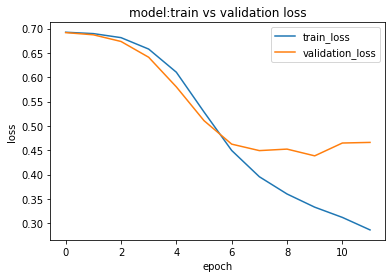

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model:train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right')
plt.show()

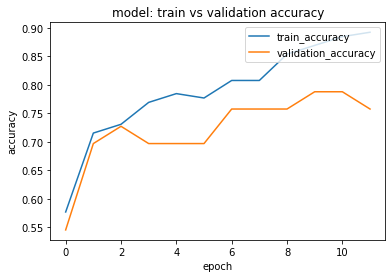

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model: train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy'], loc='upper right')
plt.show()

In [ ]:
#Grid search to experiment with different model parameters in order to obtain the ones for best accuracy. 
from sklearn.model_selection import GridSearchCV
def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim= 15))
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = make_classifier)

In [ ]:
params = {
    'batch_size':[10,20],
    'epochs':[30,20],
    'optimizer':['adam','rmsprop']
}

In [ ]:
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring="accuracy",
                           cv=2)

In [ ]:
grid_search = grid_search.fit(X_train,y_train)

Epoch 1/30
Epoch 1/30
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/30
Epoch 1/20
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/20
Epoch 1/20
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/20
Epoch 1/20
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/20
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

ValueError: ignored

In [ ]:
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
best_param

In [ ]:
best_accuracy